## Install Required Libraries
Install the necessary libraries, including Gymnasium, Stable Baselines3, and SB3 Contrib.

In [1]:
# Importing required modules
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
from stable_baselines3.common.monitor import Monitor
import matplotlib.pyplot as plt
from stable_baselines3 import PPO, DQN, A2C
from stable_baselines3.common.evaluation import evaluate_policy
from sb3_contrib.common.maskable.evaluation import evaluate_policy as evaluate_policy_maskable

from sb3_contrib import MaskablePPO
from sb3_contrib.common.wrappers import ActionMasker

%load_ext tensorboard

# Import BoundedKnapsack Environment
from knapsack_env import BoundedKnapsackEnv

# Setting the seed for reproducibility
seed = 2024
np.random.seed(seed)

In [2]:
# Define global variables
TIME_STEPS = 10000
EVAL_EPISODES = 100   
EVAL_FREQ = int(TIME_STEPS**0.5)     
VERBOSE = 0

# Create an Instance of the Environment
Create an instance of the BoundedKnapsack environment with the specified parameters.

In [3]:
# Enable the environment
env = BoundedKnapsackEnv(n_items=200, max_weight=200)

# Create evaluation environment
eval_env = Monitor(env)

# Inspect the state space and action spaces
state_space = env.reset()
action_space_size = env.action_space.n

# Print the state space and action space size
print(f"State Space: {state_space}")
print(f"Action Space Size: {action_space_size}")

State Space: (array([[ 82,  65,  60,  69,  35,  87,  35,  48,  40,  23,  15,  86,   3,
         41,  26,  64,  42,  52,  95,  67,  17,  45,  93,  30,  53,  50,
         20,  74,  49,  66,   5,  48,  51,  19,  71,  51,  10,  93,  44,
         55,  28,  93,  31,  37,  88,  30,   6,   3,   9,   9,  37,  15,
         38,  83,  39,  26,  33,  98,  69,  82,  25,  90,  18,  57,  95,
         95,  60,  65,  38,  86,  57,  80,  75,  70,  10,  19,  20,  66,
         57,  42,  36,  30,  63,  35,  22,  34,  59,  80,  48,  56,  70,
         55,  20,  21,  83,  57,  43,  66,  71,  79,   3,  99,   7,  54,
         58,  79,  69,  43,  40,   6,  34,  73,  15,  19,  32,  82,  31,
          9,   2,  31,  54,  83,  68,  44,  59,  41,  63,  28,  95,  48,
         36,  98,  91,  71,  39,  31,  60,  11,  33,  10,  94,  93,  30,
         36,  34,  20,  99,  80,  85,  89,  49,  79,  85,  76,   3,  50,
         63,  11,  83,  40,  23,  68,  29,  55,  43,  12,  28,  21,  52,
         52,  44,  45,  46,  93,  24,

# Train and Test DRL Agents
Train and test at least two different DRL agents using the algorithms provided in Stable Baselines3 with default hyperparameters.

In [4]:
# Define the policy network architecture
policy_kwargs = dict(activation_fn=torch.nn.Tanh, net_arch=[64, 64])

# Create a log directory
log_dir = './logs/'
os.makedirs(log_dir, exist_ok=True)

# Define the policy network architecture
policy_kwargs = dict(activation_fn=torch.nn.Tanh, net_arch=[64, 64])

# Training the PPO agent
ppo_model = PPO("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=VERBOSE, tensorboard_log=log_dir + 'ppo_small/')
ppo_model.learn(total_timesteps=TIME_STEPS)

# Training the DQN agent
dqn_model = DQN(
    "MlpPolicy",
    env,
    policy_kwargs=policy_kwargs,
    verbose=VERBOSE,
    tensorboard_log=log_dir + "dqn_small/",
)
dqn_model.learn(total_timesteps=TIME_STEPS)

# Evaluating the PPO agent
mean_reward_ppo, std_reward_ppo = evaluate_policy(ppo_model, eval_env, n_eval_episodes=EVAL_EPISODES)
print(f"Mean reward for PPO agent: {mean_reward_ppo} +/- {std_reward_ppo}")

# Evaluating the DQN agent
mean_reward_dqn, std_reward_dqn = evaluate_policy(dqn_model, eval_env, n_eval_episodes=EVAL_EPISODES)
print(f"Mean reward for DQN agent: {mean_reward_dqn} +/- {std_reward_dqn}")

Mean reward for PPO agent: 255.0 +/- 0.0
Mean reward for DQN agent: 183.0 +/- 0.0


# Experiment with Different Neural Network Architectures
Experiment with different neural network architectures for the DRL agents with default hyperparameters.

In [5]:
# Define the policy network architecture
policy_kwargs = dict(activation_fn=torch.nn.ReLU, net_arch=[128, 128])

# Training the PPO agent
ppo_model_large = PPO("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=VERBOSE, tensorboard_log=log_dir + 'ppo_large/')
ppo_model_large.learn(total_timesteps=TIME_STEPS)

# Training the DQN agent
dqn_model_large = DQN("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=VERBOSE, tensorboard_log=log_dir + 'dqn_large/')
dqn_model_large.learn(total_timesteps=TIME_STEPS)

# Evaluating the PPO agentP
mean_reward, std_reward = evaluate_policy(ppo_model_large, eval_env, n_eval_episodes=EVAL_EPISODES, deterministic=False)

print(f"Mean reward for PPO agent: {mean_reward} +/- {std_reward}")

# Evaluating the DQN agent
mean_reward, std_reward = evaluate_policy(dqn_model_large, eval_env, n_eval_episodes=EVAL_EPISODES, deterministic=False)

print(f"Mean reward for DQN agent: {mean_reward} +/- {std_reward}")

Mean reward for PPO agent: 855.0 +/- 0.0
Mean reward for DQN agent: 386.0 +/- 0.0


# Tune the Algorithms Hyperparameters
Tune the hyperparameters of the algorithms by hand.

In [6]:
# Define the policy network architecture
policy_kwargs = dict(activation_fn=torch.nn.ReLU, net_arch=[128, 128])

# Tuning the hyperparameters of the PPO agent
ppo_model_tuned = PPO(
    "MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=VERBOSE, 
    learning_rate=0.0003, n_steps=2048, batch_size=64, n_epochs=10, 
    gamma=0.99, gae_lambda=0.95, clip_range=0.2, ent_coef=0.01, 
    tensorboard_log=log_dir + 'ppo_tuned/'
)
ppo_model_tuned.learn(total_timesteps=TIME_STEPS)

# Evaluating the PPO agent
mean_reward_ppo, std_reward_ppo = evaluate_policy(ppo_model_tuned, eval_env, n_eval_episodes=EVAL_EPISODES, deterministic=False)
print(f"Mean reward for PPO agent after hyperparameter tuning: {mean_reward_ppo} +/- {std_reward_ppo}")

# Tuning the hyperparameters of the DQN agent
dqn_model_tuned = DQN(
    "MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=VERBOSE, 
    learning_rate=0.0001, buffer_size=1000000, learning_starts=50000, 
    batch_size=32, exploration_initial_eps=1.0, exploration_final_eps=0.1, 
    exploration_fraction=0.1, train_freq=4, gamma=0.99, 
    target_update_interval=10000, tensorboard_log=log_dir + 'dqn_tuned/'
)
dqn_model_tuned.learn(total_timesteps=TIME_STEPS)

# Evaluating the DQN agent
mean_reward_dqn, std_reward_dqn = evaluate_policy(dqn_model_tuned, eval_env, n_eval_episodes=EVAL_EPISODES, deterministic=False)
print(f"Mean reward for DQN agent after hyperparameter tuning: {mean_reward_dqn} +/- {std_reward_dqn}")

# Tuning the hyperparameters of the A2C agent
a2c_model_tuned = A2C(
    "MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=VERBOSE, 
    learning_rate=0.0007, n_steps=5, gamma=0.99, gae_lambda=1.0, 
    ent_coef=0.01, vf_coef=0.5, max_grad_norm=0.5, 
    tensorboard_log=log_dir + 'a2c_tuned/'
)
a2c_model_tuned.learn(total_timesteps=TIME_STEPS)

# Evaluating the A2C agent
mean_reward_a2c, std_reward_a2c = evaluate_policy(a2c_model_tuned, eval_env, n_eval_episodes=EVAL_EPISODES, deterministic=False)
print(f"Mean reward for A2C agent after hyperparameter tuning: {mean_reward_a2c} +/- {std_reward_a2c}")


Mean reward for PPO agent after hyperparameter tuning: 98.0 +/- 0.0
Mean reward for DQN agent after hyperparameter tuning: 138.0 +/- 0.0
Mean reward for A2C agent after hyperparameter tuning: 182.0 +/- 0.0


# Evaluate the Agents and Compare Results
Evaluate the performance of the agents and compare the best results obtained using the different algorithms.

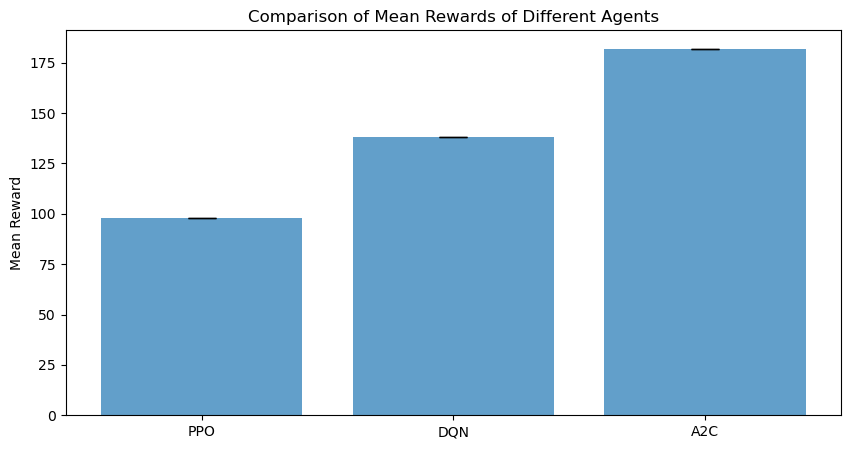

In [7]:
# Define the agents and their corresponding mean rewards and standard deviations
agents = ['PPO', 'DQN', 'A2C']
mean_rewards = [mean_reward_ppo, mean_reward_dqn, mean_reward_a2c]
std_rewards = [std_reward_ppo, std_reward_dqn, std_reward_a2c]

# Plotting the mean rewards
plt.figure(figsize=(10, 5))
plt.bar(agents, mean_rewards, yerr=std_rewards, align='center', alpha=0.7, ecolor='black', capsize=10)
plt.ylabel('Mean Reward')
plt.title('Comparison of Mean Rewards of Different Agents')
plt.show()

In [8]:
# Define the agents and their corresponding mean rewards, standard deviations, and models
agents = ['PPO', 'DQN', 'A2C']
mean_rewards = [mean_reward_ppo, mean_reward_dqn, mean_reward_a2c]
models = [ppo_model_tuned, dqn_model_tuned, a2c_model_tuned]

# Save all the 3 tuned models using list comprehension
[model.save(name) for model, name in zip(models, ["models/ppo_tuned", "models/dqn_tuned", "models/a2c_tuned"])]

# Determine the index of the best model
best_index = np.argmax(mean_rewards)

print(f"The best model is {agents[best_index]} with a mean reward of {mean_rewards[best_index]}")

The best model is A2C with a mean reward of 182.0


---

# Part 2

---

## Enabling action masking, train and test a MaskablePPO agent

In [9]:
# Define a function for the mask
def mask_fn(env):
    return env.get_mask()

# Create an instance of the environment with mask enabled
env = BoundedKnapsackEnv(n_items=200, max_weight=200, mask=True)

# Wrap the environment with the ActionMasker
vec_env = ActionMasker(env, mask_fn)

# Create an evaluation environment
eval_vec_env = Monitor(vec_env)

# Define the policy architecture
policy_kwargs = dict(
    net_arch=dict(pi=[128, 128, 128], vf=[128, 128, 128]),  
)

# Train a MaskablePPO agent
model = MaskablePPO(
    "MlpPolicy",
    vec_env,
    policy_kwargs=policy_kwargs,
    verbose=VERBOSE,
    n_steps=2048,
    batch_size=64,
    learning_rate=3e-4,
    tensorboard_log=log_dir + 'maskable_ppo/'
)

# Adjust timesteps for meaningful training
model.learn(total_timesteps=TIME_STEPS, use_masking=True)

# Evaluate the agent
mean_reward, std_reward = evaluate_policy_maskable(model, eval_vec_env, n_eval_episodes=EVAL_EPISODES, use_masking=True, deterministic=False)

print(f"Mean reward: {mean_reward} +/- {std_reward}")

c:\Users\20191678\AppData\Local\anaconda3\envs\torch-gpu\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.action_masks to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_masks` for environment variables or `env.get_wrapper_attr('action_masks')` that will search the reminding wrappers.
  logger.warn(


Mean reward: 2207.0 +/- 0.0


## Experiment with different neural network architectures and tune the algorithm hyperparameters

In [10]:
# Define a list of configurations to experiment with
configurations = [
    {
        "policy_kwargs": dict(net_arch=dict(pi=[64, 64], vf=[64, 64])),
        "learning_rate": 3e-4,
        "n_steps": 2048,
        "ent_coef": 0.0,
        "gamma": 0.99,
    },
    {
        "policy_kwargs": dict(net_arch=dict(pi=[256, 256], vf=[256, 256])),
        "learning_rate": 1e-3,
        "n_steps": 1024,
        "ent_coef": 0.01,
        "gamma": 0.97,
    },
    {
        "policy_kwargs": dict(net_arch=dict(pi=[128, 128], vf=[128, 128])),
        "learning_rate": 1e-4,
        "n_steps": 4096,
        "ent_coef": 0.02,
        "gamma": 0.95,
    },
]

# Initialize best mean reward to negative infinity
best_mean_reward = -np.inf

# Loop over the architectures and learning rates
for config in configurations:
    policy_kwargs = config["policy_kwargs"]
    model = MaskablePPO(
        "MlpPolicy",
        vec_env,
        policy_kwargs=policy_kwargs,
        verbose=VERBOSE,
        n_steps=config["n_steps"],
        batch_size=64,
        learning_rate=config["learning_rate"],
        ent_coef=config["ent_coef"],
        gamma=config["gamma"],
        gae_lambda=0.95,
        clip_range=0.2,
        vf_coef=0.5,
        max_grad_norm=0.5,
        target_kl=None,
        tensorboard_log=log_dir + 'maskable_ppo/',
    )
    model.learn(total_timesteps=TIME_STEPS, use_masking=True)
    mean_reward_mppo, std_reward_mppo = evaluate_policy_maskable(model, eval_vec_env, n_eval_episodes=EVAL_EPISODES, use_masking=True, deterministic=False)
    print(f"Architecture: {config['policy_kwargs']['net_arch']}, Learning Rate: {config['learning_rate']}, Mean reward: {mean_reward} +/- {std_reward}")    
    # If this mean reward is greater than the current best, save this model
    if mean_reward_mppo > best_mean_reward:
        best_mean_reward = mean_reward_mppo
        model.save("models/mppo_best")
        print(f"New best mean reward: {mean_reward_mppo} +/- {std_reward_mppo}, model saved.")

Architecture: {'pi': [64, 64], 'vf': [64, 64]}, Learning Rate: 0.0003, Mean reward: 2207.0 +/- 0.0
New best mean reward: 2623.0 +/- 0.0, model saved.
Architecture: {'pi': [256, 256], 'vf': [256, 256]}, Learning Rate: 0.001, Mean reward: 2207.0 +/- 0.0
New best mean reward: 3237.0 +/- 0.0, model saved.
Architecture: {'pi': [128, 128], 'vf': [128, 128]}, Learning Rate: 0.0001, Mean reward: 2207.0 +/- 0.0


## Evaluate the agent and compare the best results obtained with those of the best agent from Part 1.

In [11]:
# Load the best model from Part 1
if agents[best_index] == 'PPO':
    best_model_part1 = PPO.load("models/ppo_tuned", env=env)
elif agents[best_index] == 'DQN':
    best_model_part1 = DQN.load("models/dqn_tuned", env=env)
elif agents[best_index] == 'A2C':
    best_model_part1 = A2C.load("models/a2c_tuned", env=env)
else:
    print("Unknown model type")

# Load the best model from Part 2
best_model_part2 = MaskablePPO.load("models/mppo_best", env=env)

# Evaluate the best model from Part 1
mean_reward_part1, std_reward_part1 = evaluate_policy(best_model_part1, eval_env, n_eval_episodes=EVAL_EPISODES, deterministic=False)

# Evaluate the best model from Part 2
mean_reward_part2, std_reward_part2 = evaluate_policy_maskable(best_model_part2, eval_vec_env, n_eval_episodes=EVAL_EPISODES, deterministic=False, use_masking=True)

# Print the results
print(f"Part 1 - Mean reward: {mean_reward_part1} +/- {std_reward_part1}")
print(f"Part 2 - Mean reward: {mean_reward_part2} +/- {std_reward_part2}")

Part 1 - Mean reward: 182.0 +/- 0.0
Part 2 - Mean reward: 3237.0 +/- 0.0
